In [3]:
pip install chess

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 2.9 MB/s eta 0:00:00


In [1]:
class NQueensCSP:
    def __init__(self, n):
        self.n = n
        self.variables = list(range(n))
        self.domains = {i: list(range(n)) for i in range(n)}
        self.constraints = []

    def add_constraint(self, constraint_func):
        self.constraints.append(constraint_func)

    def is_valid_assignment(self, assignment):
        for constraint in self.constraints:
            if not constraint(assignment):
                return False
        return True

    def solve(self):
        return self.backtrack({})

    def backtrack(self, assignment):
        if len(assignment) == self.n:
            return assignment

        var = self.select_unassigned_variable(assignment)
        for value in self.order_domain_values(var, assignment):
            new_assignment = assignment.copy()
            new_assignment[var] = value
            if self.is_valid_assignment(new_assignment):
                result = self.backtrack(new_assignment)
                if result is not None:
                    return result
        return None

    def select_unassigned_variable(self, assignment):
        for var in self.variables:
            if var not in assignment:
                return var

    def order_domain_values(self, var, assignment):
        return self.domains[var]


def not_same_row(assignment):
    for i, row1 in assignment.items():
        for j, row2 in assignment.items():
            if i != j and row1 == row2:
                return False
    return True


def not_same_diagonal(assignment):
    for i, row1 in assignment.items():
        for j, row2 in assignment.items():
            if i != j and abs(i - j) == abs(row1 - row2):
                return False
    return True


def print_solution(solution, n):
    if solution:
        for i in range(n):
            row = ['.'] * n
            # The assignment might not be in order, ensure it's correctly represented
            for k, v in solution.items():
                row[v] = 'Q' if i == k else row[v]
            print(' '.join(row))
    else:
        print("No solution found.")





In [18]:
# Solve N-Queens problem with 6 queens
n = 8
csp = NQueensCSP(n)
csp.add_constraint(not_same_row)
csp.add_constraint(not_same_diagonal)
solution = csp.solve()
print_solution(solution, n)

Q . . . . . . .
. . . . Q . . .
. . . . . . . Q
. . . . . Q . .
. . Q . . . . .
. . . . . . Q .
. Q . . . . . .
. . . Q . . . .


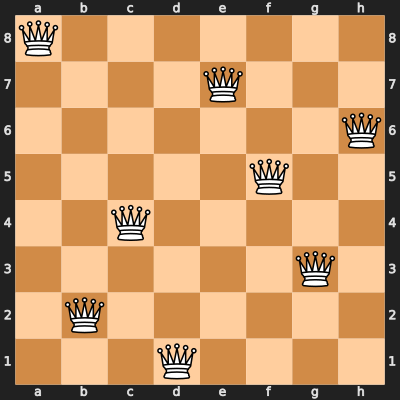

In [19]:
import chess
import chess.svg
from IPython.display import SVG

# Visualizes solution on chess board. only works for n <= 8
def place_queens_on_board(n, solution):
    board = chess.Board(None)  # Create an empty board
    for row, col in solution.items():
        square = chess.square(col, n-1-row)  # Convert (row, col) to square index
        board.set_piece_at(square, chess.Piece(chess.QUEEN, chess.WHITE))
    return board

board = place_queens_on_board(n, solution)

# To display the SVG in a Jupyter notebook:
SVG(chess.svg.board(board=board, size=400))


